In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
df=pd.read_csv("data.csv")

In [51]:
df

,Investor Type,Age,Equity,Mutual Funds,Debt Funds,Sovereign Gold Bonds,Government Bonds,Public Provident Fund,Fixed Deposits,Unnamed: 9
0,Aggressive Investor,20.0,0.70,0.20,0.05,0.00,0.05,0.00,0.00,NaN
1,Aggressive Investor,30.0,0.60,0.20,0.10,0.00,0.10,0.00,0.00,NaN
2,Aggressive Investor,40.0,0.50,0.20,0.15,0.00,0.15,0.00,0.00,NaN
3,Aggressive Investor,50.0,0.40,0.20,0.20,0.00,0.20,0.00,0.00,NaN
4,Conservative Investor,20.0,0.20,0.20,0.20,0.10,0.20,0.05,0.05,NaN
5,Conservative Investor,30.0,0.10,0.20,0.30,0.10,0.20,0.05,0.05,NaN
6,Conservative Investor,40.0,0.05,0.15,0.35,0.10,0.25,0.05,0.05,NaN
7,Conservative Investor,50.0,0.00,0.10,0.40,0.10,0.30,0.05,0.05,NaN
8,Moderate Investor,20.0,0.40,0.20,0.15,0.05,0.15,0.03,0.03,NaN
9,Moderate Investor,30.0,0.30,0.20,0.20,0.10,0.15,0.03,0.03,NaN


In [55]:
df.drop(['Unnamed: 9'], axis=1,inplace=True)

In [57]:
df=df.dropna(axis=0, )

In [58]:
df['Investor Type'].unique()

array(['Aggressive Investor ', 'Conservative Investor ',
       'Moderate Investor '], dtype=object)

In [59]:
df['Investor Type']=df['Investor Type'].replace({'Aggressive Investor ':3, 'Moderate Investor ':2,'Conservative Investor ':1})

C:\Users\Akshay Kumar BM\AppData\Local\Temp\ipykernel_14592\2699450749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Investor Type']=df['Investor Type'].replace({'Aggressive Investor ':3, 'Moderate Investor ':2,'Conservative Investor ':1})


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Investor Type          12 non-null     int64  
 1   Age                    12 non-null     float64
 2    Equity                12 non-null     float64
 3   Mutual Funds           12 non-null     float64
 4   Debt Funds             12 non-null     float64
 5   Sovereign Gold Bonds   12 non-null     float64
 6   Government Bonds       12 non-null     float64
 7   Public Provident Fund  12 non-null     float64
 8   Fixed Deposits         12 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 960.0 bytes


In [61]:
df.describe()

,Investor Type,Age,Equity,Mutual Funds,Debt Funds,Sovereign Gold Bonds,Government Bonds,Public Provident Fund,Fixed Deposits
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.000000,35.000000,0.295833,0.187500,0.220833,0.062500,0.183333,0.026667,0.026667
std,0.852803,11.677484,0.226092,0.031079,0.103261,0.048265,0.068534,0.021462,0.021462
min,1.000000,20.000000,0.000000,0.100000,0.050000,0.000000,0.050000,0.000000,0.000000
25%,1.000000,27.500000,0.100000,0.200000,0.150000,0.000000,0.150000,0.000000,0.000000
50%,2.000000,35.000000,0.250000,0.200000,0.200000,0.100000,0.200000,0.030000,0.030000
75%,3.000000,42.500000,0.425000,0.200000,0.300000,0.100000,0.212500,0.050000,0.050000
max,3.000000,50.000000,0.700000,0.200000,0.400000,0.100000,0.300000,0.050000,0.050000


In [62]:
df.corr()

,Investor Type,Age,Equity,Mutual Funds,Debt Funds,Sovereign Gold Bonds,Government Bonds,Public Provident Fund,Fixed Deposits
Investor Type,1.000000e+00,3.243169e-17,0.872260,0.514496,-0.774253,-0.883452,-0.699942,-9.933993e-01,-9.933993e-01
Age,3.243169e-17,1.000000e+00,-0.456236,-0.438357,0.621978,0.120972,0.681554,-7.551004e-17,-7.551004e-17
Equity,8.722599e-01,-4.562359e-01,1.000000,0.541763,-0.959686,-0.890355,-0.928937,-8.836763e-01,-8.836763e-01
Mutual Funds,5.144958e-01,-4.383570e-01,0.541763,1.000000,-0.690473,-0.340899,-0.640209,-4.770264e-01,-4.770264e-01
Debt Funds,-7.742526e-01,6.219776e-01,-0.959686,-0.690473,1.000000,0.763817,0.952730,7.725604e-01,7.725604e-01
Sovereign Gold Bonds,-8.834522e-01,1.209717e-01,-0.890355,-0.340899,0.763817,1.000000,0.687073,9.215018e-01,9.215018e-01
Government Bonds,-6.999424e-01,6.815542e-01,-0.928937,-0.640209,0.952730,0.687073,1.000000,7.004728e-01,7.004728e-01
Public Provident Fund,-9.933993e-01,-7.551004e-17,-0.883676,-0.477026,0.772560,0.921502,0.700473,1.000000e+00,1.000000e+00
Fixed Deposits,-9.933993e-01,-7.551004e-17,-0.883676,-0.477026,0.772560,0.921502,0.700473,1.000000e+00,1.000000e+00


<Axes: >

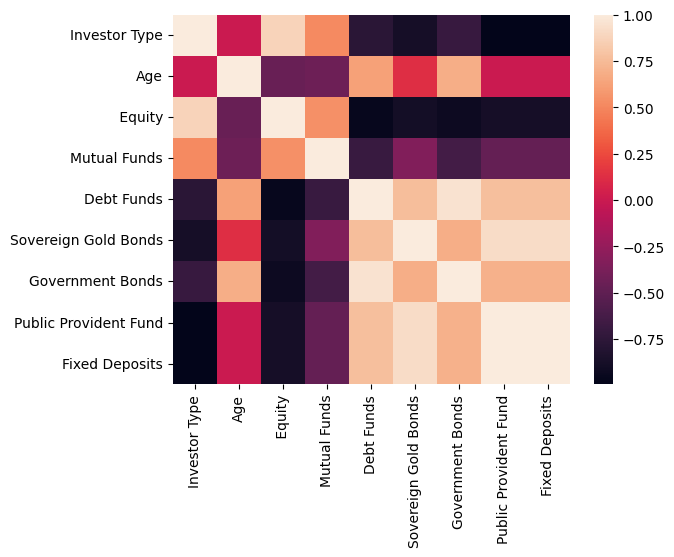

In [63]:
sns.heatmap(df.corr())

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
x=df[['Age','Investor Type']]
y=df.drop(['Age','Investor Type'],axis=1)


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the model with the specified hyperparameters
model = RandomForestRegressor(
    n_estimators=100,     # Number of trees in the forest
    max_depth=None,       # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split a node
    min_samples_leaf=1,   # Minimum number of samples required at each leaf node
    bootstrap=False       # Method of selecting samples for training each tree
)

# Fit the model on the training data
model.fit(x, y)

# Evaluate the model
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.1733040354056238e-31


In [66]:
import pickle

# Save the model to disk
filename = 'portfolio.pkl'
with open(filename, 'wb') as file:
    model=pickle.dump(model, file)

print(f"Model saved to {filename}")


Model saved to portfolio.pkl


In [67]:
import numpy as np 
predict_value=model.predict(pd.DataFrame({"Age":[12],'Investor Type':[3]}))[0]
df_result=predict_value/predict_value.sum()*100
df_round=np.round(df_result)
print(df_round)

AttributeError: 'NoneType' object has no attribute 'predict'

In [68]:
filename = 'portfolio.pkl'
with open(filename, 'rb') as file:
    model=pickle.load( file)

In [69]:
model.predict(pd.DataFrame({"Age":[12],'Investor Type':[3]}))

array([[0.7 , 0.2 , 0.05, 0.  , 0.05, 0.  , 0.  ]])

In [71]:
filename = 'portfolio.pkl'
with open(filename, 'rb') as file:
    model=pickle.load( file)

def portfolio_allocation(Age,Investor_Type):
    Investor_Type=Investor_Type.replace("Aggressive Investor ","3")
    Investor_Type=Investor_Type.replace("Moderate Investor ","2")
    Investor_Type=Investor_Type.replace("Conservative Investor ","1")
    df=pd.DataFrame({"Age":[Age],'Investor Type':[Investor_Type]})

    predict_value=model.predict(df)[0]
    df_result=predict_value/predict_value.sum()*100
    df_round=np.round(df_result)
    print(df_round) 

portfolio_allocation(20,"Moderate Investor ")
    

[40. 20. 15.  5. 15.  3.  3.]
